# <center>ETUDE DES CORRELATIONS</center> #

# <font color='#5BA69E'>INTRODUCTION</font> ##

Ce notebook utilise comme dataset des données de l'INSEE que l'équipe projet French Industry a préalablement transformées.

L'objectif est ici :

- 1) de trouver quelles variables de ce dataset sont les plus corrélées à notre variable cible, l'indicateur de pauvreté nommé "TP6020"  
- 2) de réaliser un modèle prédictif de la variable cible TP6020 à partir des variables séléctionnées dans l'étape 1

# <font color='#5BA69E'>IMPORT DES LIBRAIRIES</font> ##

In [1]:
import pandas as pd
import numpy as np

#élargissement de la visualisation des tableaux pandas
pd.set_option('display.max_columns', None)

#suppression des warnings
import warnings
warnings.filterwarnings('ignore')

#visualisations
import seaborn as sns
import matplotlib.pyplot as plt

#stats
from scipy.stats import pearsonr

#modélisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn.pipeline import Pipeline

# <font color='#5BA69E'>CHARTE GRAPHIQUE</font> ##

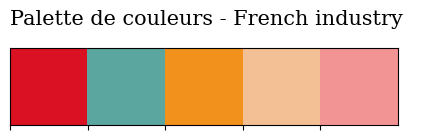

In [2]:
sns.palplot(["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"])
plt.title("Palette de couleurs - French industry  ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [3]:
#ouverture du déscriptif des variables et création d'un dictionnaire pour utilisation ultérieure
desc_var = pd.read_csv('../files/description_variables.csv', sep=';')
desc_var_dic = dict(list(zip(desc_var['CODVAR'], desc_var['Description'])))

# <font color='#5BA69E'>ETUDE DES CORRELATIONS</font> ##

In [4]:
df = pd.read_csv('../files/pauvrete_2020_all_v01.csv')

In [5]:
df.head()

,CODGEO,SNHMC20,SNHMP20,SNHME20,SNHMO20,SNHM1820,SNHM2620,SNHM5020,chomeur_1564,actif_occ_temps_plein_15plus,actif_occ_temps_partiel_15plus,inactif_1564,inactif_65plus,D120H,D920H,MED20H,Ecart H/F études supérieures,Ecart H/F temps partiels,Ecart H/F actifs occupés,Ecart H/F Salaire net moyen,ets_total,ets_industrie_p,ets_impact_local_p,ets_taille50p_p,ets_creation_p,R_P19_POP1529,R_P19_POP3044,R_P19_POP4559,R_P19_POP6074,R_P19_POP7589,R_C19_MENPSEUL,R_C19_MENCOUPSENF,R_C19_MENCOUPAENF,R_C19_MENFAMMONO,TP6020,pauvrete
0,01004,25.221939,16.950395,11.259209,11.772666,10.880315,15.072711,17.255747,8.9,43.7,8.1,18.4,20.9,6.313187,19.532967,11.576923,-15.323247,65.525193,13.753185,19.494281,586.0,5.3,78.8,3.6,32.8,21.77,19.32,16.92,14.53,7.39,43.85,22.94,22.16,9.82,17.0,1
1,01007,24.391671,16.179052,11.917058,12.520221,10.544073,15.263487,16.961952,4.8,50.3,8.9,15.7,20.3,7.928571,20.516484,13.368132,-31.578947,80.769231,1.234568,15.546228,68.0,16.2,60.3,0.0,45.6,14.04,22.54,19.07,15.25,6.25,28.94,27.23,32.77,9.36,7.0,0
2,01014,27.940065,16.384056,12.175141,11.848787,11.058325,14.116861,16.528222,7.6,41.7,5.6,20.2,24.8,7.258242,20.516484,11.906593,10.287663,73.408192,20.559839,21.705337,229.0,23.1,54.6,6.1,20.1,14.37,18.44,20.74,20.31,6.33,25.51,33.81,32.12,7.82,10.0,1
3,01025,25.822076,15.365464,11.663794,12.400297,10.385396,14.750372,16.854860,4.5,51.2,8.6,15.8,19.8,8.296703,20.170330,13.120879,-3.030303,78.947368,6.382979,15.732006,60.0,11.7,51.7,1.7,40.0,14.34,20.00,21.92,16.26,5.31,21.63,31.97,39.18,6.27,6.0,0
4,01031,27.524098,15.081495,11.474574,11.759778,10.416043,13.709139,16.234914,8.6,42.1,6.9,21.8,20.6,6.192308,19.318681,11.087912,5.875605,57.457168,14.735847,17.475285,161.0,28.6,42.9,5.6,23.0,18.72,19.35,18.23,16.46,6.17,40.22,25.74,23.54,7.50,19.0,1


**On note qu'en dehors du CODGEO, toutes nos variables sont numériques**

In [6]:
df.dtypes

CODGEO                             object
SNHMC20                           float64
SNHMP20                           float64
SNHME20                           float64
SNHMO20                           float64
SNHM1820                          float64
SNHM2620                          float64
SNHM5020                          float64
chomeur_1564                      float64
actif_occ_temps_plein_15plus      float64
actif_occ_temps_partiel_15plus    float64
inactif_1564                      float64
inactif_65plus                    float64
D120H                             float64
D920H                             float64
MED20H                            float64
Ecart H/F études supérieures      float64
Ecart H/F temps partiels          float64
Ecart H/F actifs occupés          float64
Ecart H/F Salaire net moyen       float64
ets_total                         float64
ets_industrie_p                   float64
ets_impact_local_p                float64
ets_taille50p_p                   

### <font color='#5BA69E'>HEATMAP</font> ###

**Pour un premier apperçu, on réalise une heatmap des corrélations**

<Axes: >

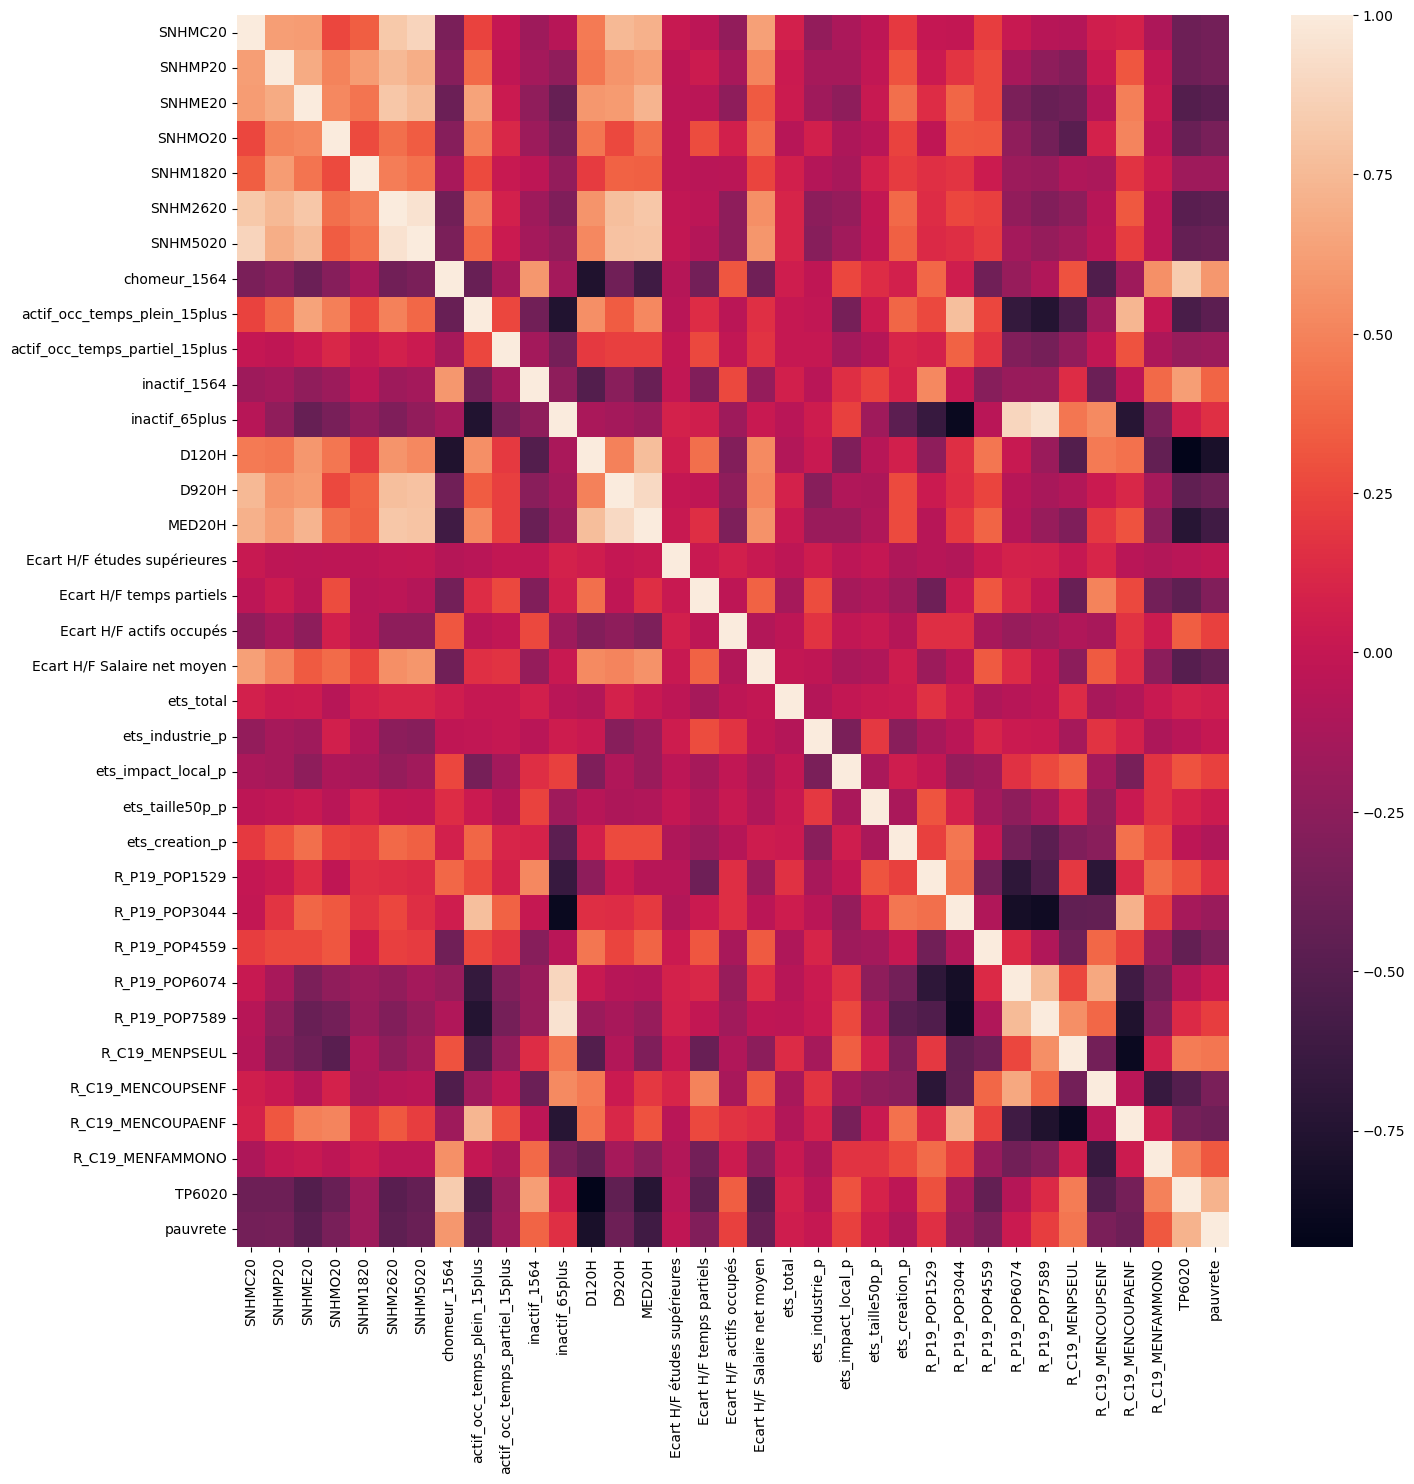

In [7]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr())

**en regardant la variable cible TP6020, notre heatmap nous indique que :**

- la variable chomeur_1564 semble **fortement** corrélée positivement avec la variable cible
- la variable pauvrete semble **relativement** corrélée positivement avec la variable cible
- la variable D120H semble **fortement** corrélée négativement avec la variable cible
- la variable MED20H semble **relativement** corrélée négativement avec la variable cible
- la variable inactif_1564 semble **relativement** corrélée positivement avec la variable cible


### <font color='#5BA69E'>COEFFICIENT DE PEARSON</font> ###

**Regardons de plus près à l'aide d'un tableau avec les coefficients de Pearson**

In [8]:
#un dictionnaire pour le nom des colonnes en "key" et le coefficient en "value"
results_dict = {}

#un dictionnaire pour le nom des colonnes en "key" et la p-value en "value"
pvalue_dict = {}

#Une boucle qui réalise un test de pearson avec chaque variable numérique du dataframe vs notre variable cible, la TP6020
for i in df.select_dtypes('number').columns:
    test = pearsonr(df.TP6020, df[i])
    results_dict[i] = test[0]
    pvalue_dict[i] = test[1]

#Création d'un dataframe avec les résultats des tests de Pearson. Utilisation des dictionnaires créés précédemment.
df_results = pd.DataFrame(results_dict.items())
df_results['p_value'] = df_results[0].map(pvalue_dict)
df_results.columns = ['col','score_test', 'pvalue']

#On retire la TP6020 de ce dataframe récapitulatif, la corrélation étant forcemment de 1.0
df_results = df_results[df_results.col != 'TP6020']

#Ajout des descriptions des variables si existantes (sinon NaN)
df_results['desc'] = df_results.col.map(desc_var_dic)

#Affichage des top 10 positifs et négatifs
print('top 10 des variables les plus corrélées positivement avec la TP6020')
display(df_results.sort_values(by='score_test', ascending=False).reset_index(drop=True).head(10))
print('top 10 des variables les plus corrélées négativement avec la TP6020')
display(df_results.sort_values(by='score_test', ascending=False).reset_index(drop=True).tail(10))

top 10 des variables les plus corrélées positivement avec la TP6020


,col,score_test,pvalue,desc
0,chomeur_1564,0.834888,0.000000e+00,NaN
1,pauvrete,0.716247,0.000000e+00,NaN
2,inactif_1564,0.620019,0.000000e+00,NaN
3,R_C19_MENFAMMONO,0.492443,1.597718e-258,NaN
4,R_C19_MENPSEUL,0.465504,1.348409e-227,NaN
5,Ecart H/F actifs occupés,0.347260,1.022268e-120,NaN
6,ets_impact_local_p,0.299687,6.371811e-89,NaN
7,R_P19_POP1529,0.291457,5.416303e-84,NaN
8,R_P19_POP7589,0.125702,1.952108e-16,NaN
9,ets_taille50p_p,0.093671,9.461759e-10,NaN


top 10 des variables les plus corrélées négativement avec la TP6020


,col,score_test,pvalue,desc
24,R_P19_POP4559,-0.440938,1.023836e-201,NaN
25,D920H,-0.451461,1.528594e-212,NaN
26,Ecart H/F temps partiels,-0.459993,1.323767e-221,NaN
27,SNHM2620,-0.479997,6.866104e-244,Salaire net horaire moyen 26 à 50 ans en 2020 (€)
28,Ecart H/F Salaire net moyen,-0.495448,3.790276e-262,NaN
29,R_C19_MENCOUPSENF,-0.504582,2.168609e-273,NaN
30,SNHME20,-0.517350,1.083717e-289,Salaire net hor. moy. employés en 2020 (€)
31,actif_occ_temps_plein_15plus,-0.561972,0.000000e+00,NaN
32,MED20H,-0.731755,0.000000e+00,NaN
33,D120H,-0.932784,0.000000e+00,NaN


### <font color='#5BA69E'>VISUALISATION DU TOP 5 DES COEFFICIENTS</font> ###

Text(0.5, 1.0, 'Corrélation entre TP6020 et pauvrete')

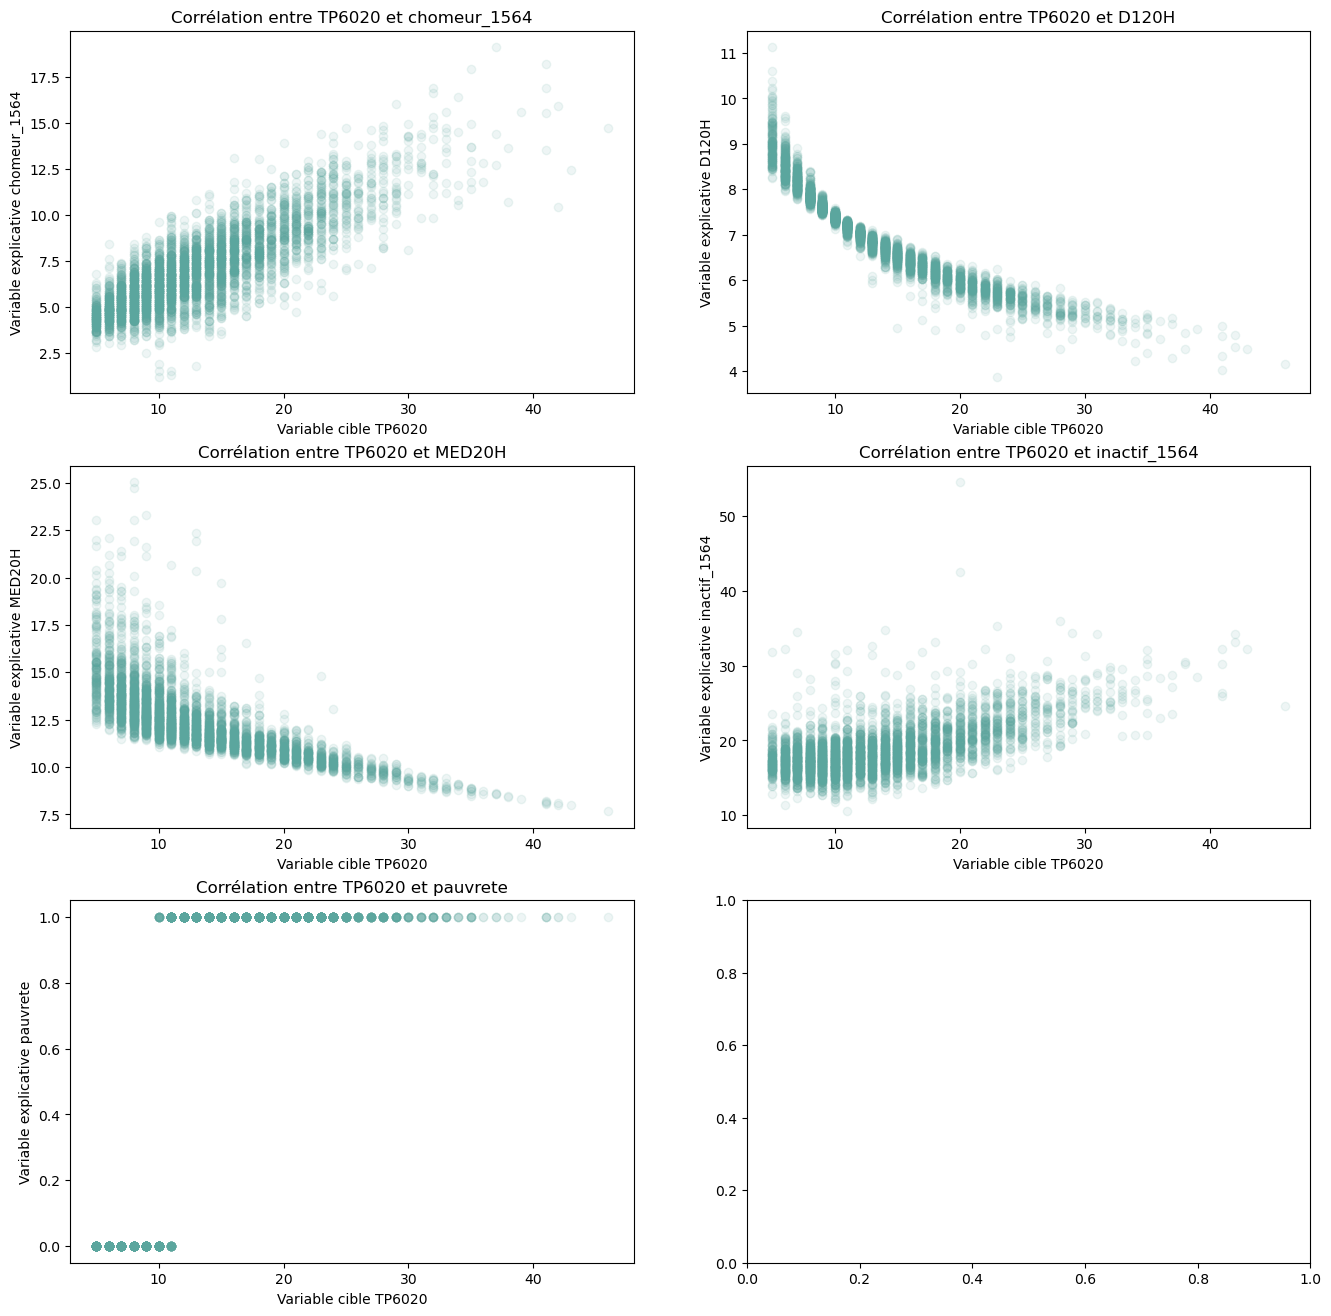

In [9]:
plt.subplots(3,2, figsize=(16,16))
plt.subplot(321)
plt.scatter(df.TP6020, df['chomeur_1564'], alpha=0.1, color='#5BA69E')
plt.xlabel('Variable cible TP6020')
plt.ylabel('Variable explicative chomeur_1564')
plt.title('Corrélation entre TP6020 et chomeur_1564')

plt.subplot(322)
plt.scatter(df.TP6020, df['D120H'], alpha=0.1, color='#5BA69E')
plt.xlabel('Variable cible TP6020')
plt.ylabel('Variable explicative D120H')
plt.title('Corrélation entre TP6020 et D120H')

plt.subplot(323)
plt.scatter(df.TP6020, df['MED20H'], alpha=0.1, color='#5BA69E')
plt.xlabel('Variable cible TP6020')
plt.ylabel('Variable explicative MED20H')
plt.title('Corrélation entre TP6020 et MED20H')

plt.subplot(324)
plt.scatter(df.TP6020, df['inactif_1564'], alpha=0.1, color='#5BA69E')
plt.xlabel('Variable cible TP6020')
plt.ylabel('Variable explicative inactif_1564')
plt.title('Corrélation entre TP6020 et inactif_1564')

plt.subplot(325)
plt.scatter(df.TP6020, df['pauvrete'], alpha=0.1, color='#5BA69E')
plt.xlabel('Variable cible TP6020')
plt.ylabel('Variable explicative pauvrete')
plt.title('Corrélation entre TP6020 et pauvrete')

Si certaines variables semblent assez fortement corrélées, le biais potentiel est leur disponibilité au de-là de ce dataset.
Ainsi, les variables de revenu médian (MED20) ou de salaire (SNHME20) sont par exemple des variables que l'on sait incomplètes et qu'il peut donc être périlleux de conserver pour notre modèle.

# <font color='#5BA69E'>CHOIX DES VARIABLES POUR LE MACHINE LEARNING</font> #

On tente ici de regrouper des variables pour former un dataset de Machine Learning en ignorant les variables aux données limitées

In [10]:
#Sélection de la variable cible
y = df.TP6020

#Séléction des variables explicatives
#Sont exclues les variables MED20, SNHME20 et pauvrete par manque de disponibilité potentiel
#Sont conservées les autres variables ayant un coeff > 0.5 ou < -0.5
X = df[['chomeur_1564', 'D120H', 'inactif_1564', 'actif_occ_temps_plein_15plus', 'R_C19_MENCOUPSENF']]
X.head()

,chomeur_1564,D120H,inactif_1564,actif_occ_temps_plein_15plus,R_C19_MENCOUPSENF
0,8.9,6.313187,18.4,43.7,22.94
1,4.8,7.928571,15.7,50.3,27.23
2,7.6,7.258242,20.2,41.7,33.81
3,4.5,8.296703,15.8,51.2,31.97
4,8.6,6.192308,21.8,42.1,25.74


# <font color='#5BA69E'>MODELISATION - PREDICTION TP6020</font> #

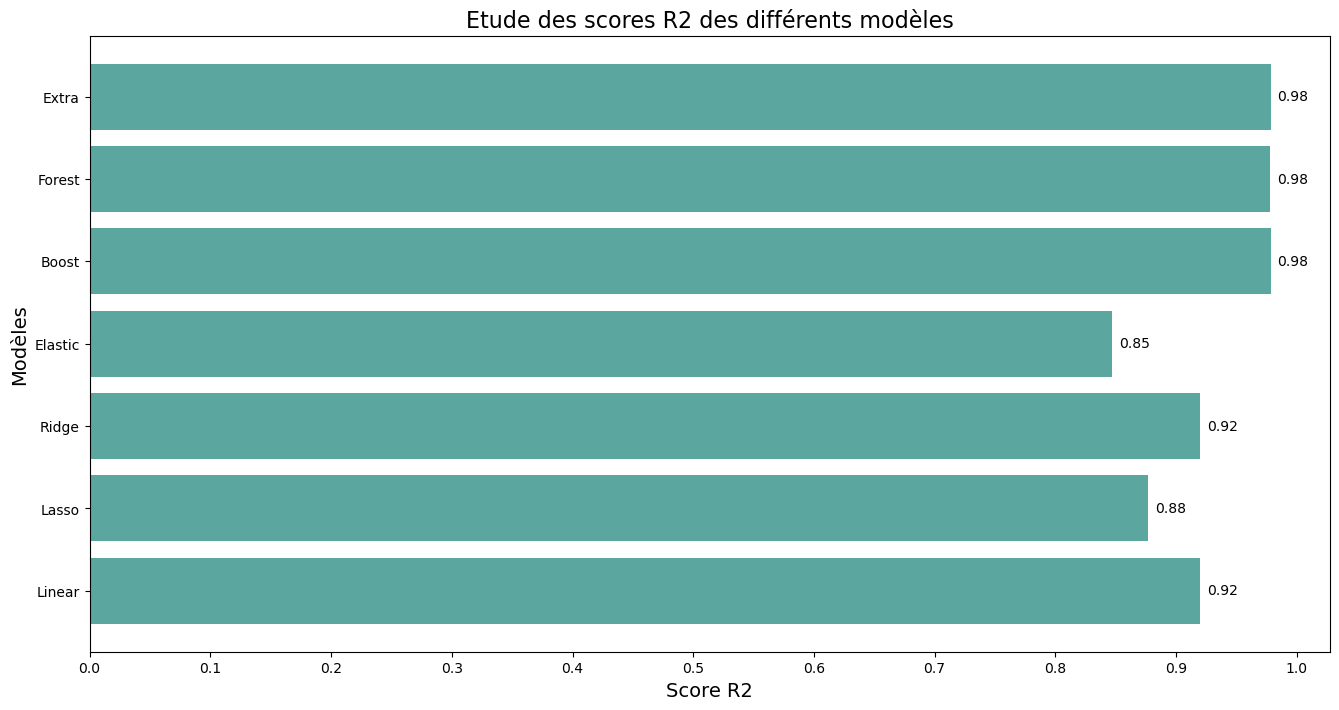

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

models = [linear_model.LinearRegression(),
         linear_model.Lasso(),
         linear_model.Ridge(),
         linear_model.ElasticNet(),
         ensemble.GradientBoostingRegressor(),
         ensemble.RandomForestRegressor(),
         ensemble.ExtraTreesRegressor()]

model_names = ['Linear', 'Lasso', 'Ridge', 'Elastic', 'Boost', 'Forest', 'Extra']

scores = []
mse = []
mae = []
y_predicts = []

for model in models:
    pipe = Pipeline(steps=[('normalisation', scaler),('model', model)])
    fits = pipe.fit(X_train, y_train)
    scores.append(metrics.r2_score(y_test, fits.predict(X_test)))
    mse.append(metrics.mean_squared_error(y_test, fits.predict(X_test)))
    mae.append(metrics.median_absolute_error(y_test, fits.predict(X_test)))
    y_predicts.append(pipe.predict(X_test))

fig, ax = plt.subplots(1,1, figsize=(16,8))
barh = ax.barh(model_names, scores, color='#5BA69E')
labels = [np.round(i,2) for i in barh.datavalues]
ax.bar_label(barh, labels=labels, padding=5)
ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_xlabel('Score R2', fontsize=14)
ax.set_ylabel('Modèles', fontsize=14)
ax.set_title('Etude des scores R2 des différents modèles', fontsize=16)
plt.show()

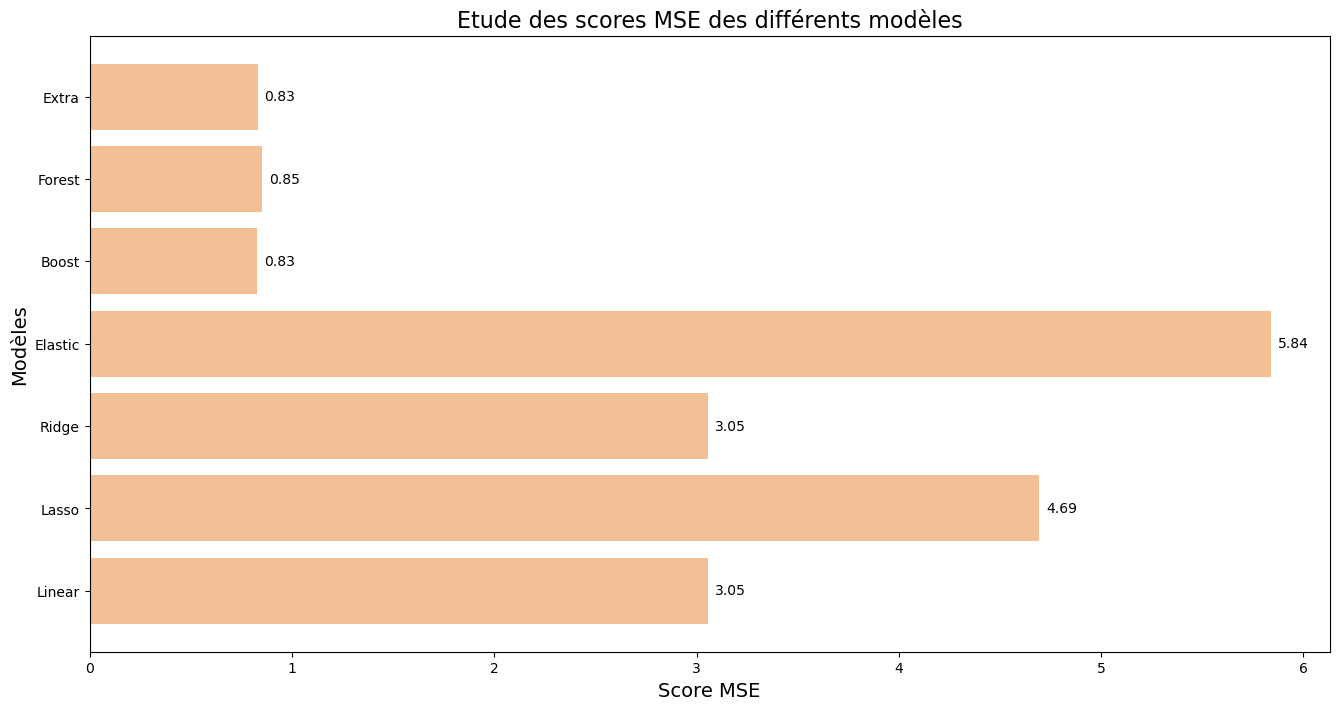

In [12]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
barh = ax.barh(model_names, mse, color='#F2C094')
labels = [np.round(i,2) for i in barh.datavalues]
ax.bar_label(barh, labels=labels, padding=5)
ax.set_xlabel('Score MSE', fontsize=14)
ax.set_ylabel('Modèles', fontsize=14)
ax.set_title('Etude des scores MSE des différents modèles', fontsize=16)
plt.show()

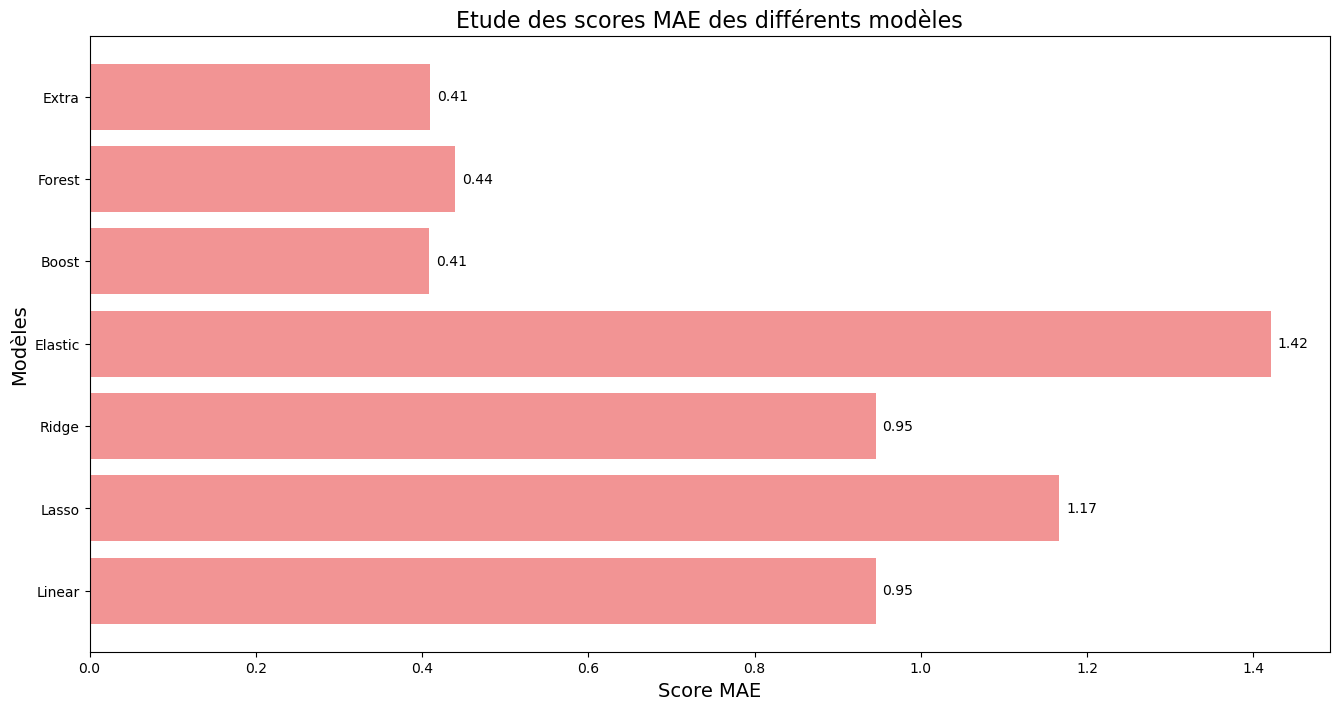

In [13]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
barh = ax.barh(model_names, mae, color='#F29494')
labels = [np.round(i,2) for i in barh.datavalues]
ax.bar_label(barh, labels=labels, padding=5)
ax.set_xlabel('Score MAE', fontsize=14)
ax.set_ylabel('Modèles', fontsize=14)
ax.set_title('Etude des scores MAE des différents modèles', fontsize=16)
plt.show()

In [14]:
for i in range(0, np.size(model_names) -1):
    print('10 premières lignes de '+model_names[i])
    display(pd.DataFrame({'y_true': y_test, 'y_predict': y_predicts[i]}).head(10))

10 premières lignes de Linear


,y_true,y_predict
1024,15.0,16.020733
2177,14.0,11.424382
1444,17.0,17.035643
3386,12.0,13.232462
3203,15.0,13.128702
721,9.0,10.763417
3516,5.0,-0.865897
1113,7.0,4.959947
1138,12.0,11.570950
2528,11.0,12.052142


10 premières lignes de Lasso


,y_true,y_predict
1024,15.0,16.275260
2177,14.0,12.723253
1444,17.0,15.798450
3386,12.0,13.199634
3203,15.0,13.585635
721,9.0,10.862665
3516,5.0,0.346188
1113,7.0,6.400645
1138,12.0,12.748431
2528,11.0,12.627140


10 premières lignes de Ridge


,y_true,y_predict
1024,15.0,16.018706
2177,14.0,11.421332
1444,17.0,17.036375
3386,12.0,13.232000
3203,15.0,13.126472
721,9.0,10.765042
3516,5.0,-0.859026
1113,7.0,4.961932
1138,12.0,11.569099
2528,11.0,12.051268


10 premières lignes de Elastic


,y_true,y_predict
1024,15.0,14.943375
2177,14.0,11.022639
1444,17.0,15.830703
3386,12.0,13.079192
3203,15.0,12.205007
721,9.0,11.844581
3516,5.0,4.183267
1113,7.0,7.139182
1138,12.0,11.552901
2528,11.0,12.225842


10 premières lignes de Boost


,y_true,y_predict
1024,15.0,15.760306
2177,14.0,12.373148
1444,17.0,16.769684
3386,12.0,11.688850
3203,15.0,14.601783
721,9.0,8.944523
3516,5.0,5.185240
1113,7.0,6.501733
1138,12.0,11.672322
2528,11.0,11.037070


10 premières lignes de Forest


,y_true,y_predict
1024,15.0,15.87
2177,14.0,13.14
1444,17.0,16.28
3386,12.0,11.78
3203,15.0,14.10
721,9.0,8.84
3516,5.0,5.10
1113,7.0,6.42
1138,12.0,11.87
2528,11.0,11.03


**3 modèles sortent clairement du lot : Elastic, Boost et Forest avec un score R2 de 0.98**  
**Les comparaisons entre notre jeu de test et nos prédictions sont très satisfaisantes et peuvent clairement faire l'objet d'une mise en production.**